# **Credit Risk Prediction**
In this project, the objective is to predict the credit risk of customers. The dataset comprises approximately **466,285** records and **74** attributes pertaining to customer information. By developing this model, it will assist the bank in making informed decision about extending loans to customers.


# **Importing Dependencies and Dataset**

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [32]:
df_raw = pd.read_csv('/content/drive/MyDrive/Dataset/loan_dataset/loan_data_2007_2014.csv')
df_raw

<ipython-input-32-66adb04623bb>:1: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  df_raw = pd.read_csv('/content/drive/MyDrive/Dataset/loan_dataset/loan_data_2007_2014.csv')


,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466280,466280,8598660,1440975,18400,18400,18400.0,60 months,14.47,432.64,C,...,NaN,NaN,NaN,NaN,NaN,NaN,29900.0,NaN,NaN,NaN
466281,466281,9684700,11536848,22000,22000,22000.0,60 months,19.97,582.50,D,...,NaN,NaN,NaN,NaN,NaN,NaN,39400.0,NaN,NaN,NaN
466282,466282,9584776,11436914,20700,20700,20700.0,60 months,16.99,514.34,D,...,NaN,NaN,NaN,NaN,NaN,NaN,13100.0,NaN,NaN,NaN
466283,466283,9604874,11457002,2000,2000,2000.0,36 months,7.90,62.59,A,...,NaN,NaN,NaN,NaN,NaN,NaN,53100.0,NaN,NaN,NaN


In [33]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 75 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   466285 non-null  int64  
 1   id                           466285 non-null  int64  
 2   member_id                    466285 non-null  int64  
 3   loan_amnt                    466285 non-null  int64  
 4   funded_amnt                  466285 non-null  int64  
 5   funded_amnt_inv              466285 non-null  float64
 6   term                         466285 non-null  object 
 7   int_rate                     466285 non-null  float64
 8   installment                  466285 non-null  float64
 9   grade                        466285 non-null  object 
 10  sub_grade                    466285 non-null  object 
 11  emp_title                    438697 non-null  object 
 12  emp_length                   445277 non-null  object 
 13 

As we see here, there are actually 73 features in this dataset, and some of them has a lot of null or NaN values in it.

In [34]:
df = df_raw[['int_rate', 'annual_inc', 'emp_length', 'home_ownership', 'loan_amnt', 'tot_cur_bal', 'total_rec_late_fee','total_rec_int','total_pymnt','last_pymnt_amnt','loan_status','grade']]
df

,int_rate,annual_inc,emp_length,home_ownership,loan_amnt,tot_cur_bal,total_rec_late_fee,total_rec_int,total_pymnt,last_pymnt_amnt,loan_status,grade
0,10.65,24000.0,10+ years,RENT,5000,NaN,0.00,861.07,5861.071414,171.62,Fully Paid,B
1,15.27,30000.0,< 1 year,RENT,2500,NaN,0.00,435.17,1008.710000,119.66,Charged Off,C
2,15.96,12252.0,10+ years,RENT,2400,NaN,0.00,603.65,3003.653644,649.91,Fully Paid,C
3,13.49,49200.0,10+ years,RENT,10000,NaN,16.97,2209.33,12226.302210,357.48,Fully Paid,C
4,12.69,80000.0,1 year,RENT,3000,NaN,0.00,1009.07,3242.170000,67.79,Current,B
...,...,...,...,...,...,...,...,...,...,...,...,...
466280,14.47,110000.0,4 years,MORTGAGE,18400,294998.0,0.00,4557.36,10383.360000,432.64,Current,C
466281,19.97,78000.0,10+ years,MORTGAGE,22000,221830.0,0.00,2840.88,4677.920000,17.50,Charged Off,D
466282,16.99,46000.0,7 years,MORTGAGE,20700,73598.0,0.00,6072.29,12343.980000,514.34,Current,D
466283,7.90,83000.0,3 years,OWN,2000,591610.0,0.00,126.58,2126.579838,1500.68,Fully Paid,A



After reading the dictionary of each features, we decided to take only these features :
1. int_rate := interest rate of the loan
2. annual_inc := annual income of the customer
3. emp_length := employment length of the customer
4. home_ownership := customer's home ownership status
5. loan_amnt := the amount of loan customer assigned
6. tot_cur_bal := total current balance of the customer
7. total_rec_late_fee := fee of late payment until now
8. total_rec_int := total interest rate until now
9. total_pymnt := total payment that have been paid by customer
10. last_pymnt_amnt := last payment that is paid by the customer
11. loan_status := is there any loan still
12. grade := customers grade status

**loan_status will be the target feature for this task**

# **Exploratory Data Analysis**

## Check for all features that has missing values

In [35]:
missing_values_summary = df.isna().sum()
print(missing_values_summary[missing_values_summary > 0])

annual_inc         4
emp_length     21008
tot_cur_bal    70276
dtype: int64


There are some missing values in the features, we will handle it on the preprocessing part

## Distribution of the target value

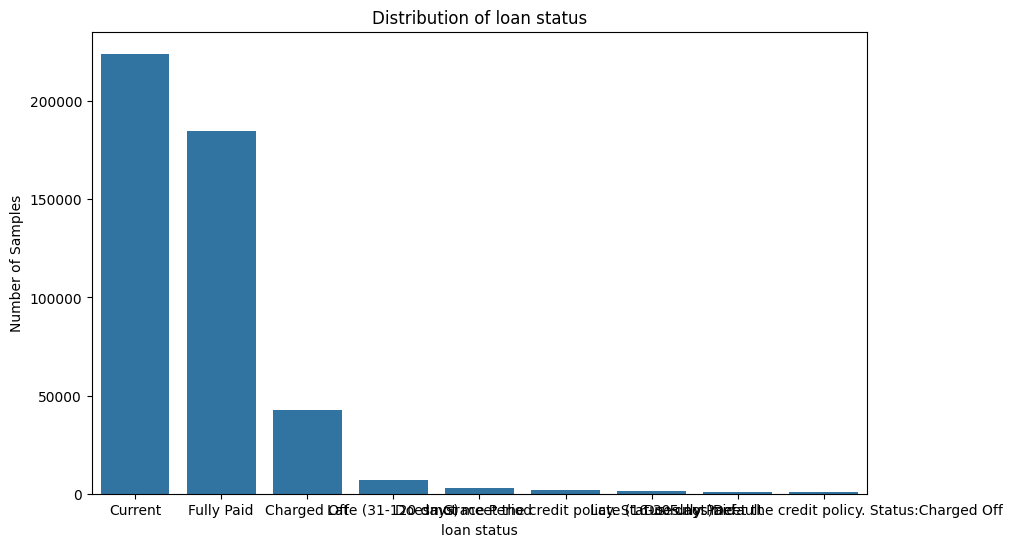

In [36]:
import seaborn as sns
label_counts = df['loan_status'].value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(x=label_counts.index, y=label_counts.values)
plt.title('Distribution of loan status')
plt.xlabel('loan status')
plt.ylabel('Number of Samples')
plt.show()

In [37]:
print(label_counts)

Current                                                224226
Fully Paid                                             184739
Charged Off                                             42475
Late (31-120 days)                                       6900
In Grace Period                                          3146
Does not meet the credit policy. Status:Fully Paid       1988
Late (16-30 days)                                        1218
Default                                                   832
Does not meet the credit policy. Status:Charged Off       761
Name: loan_status, dtype: int64


As we can see here, it is not equally distributed

## Boxplot

<Axes: >

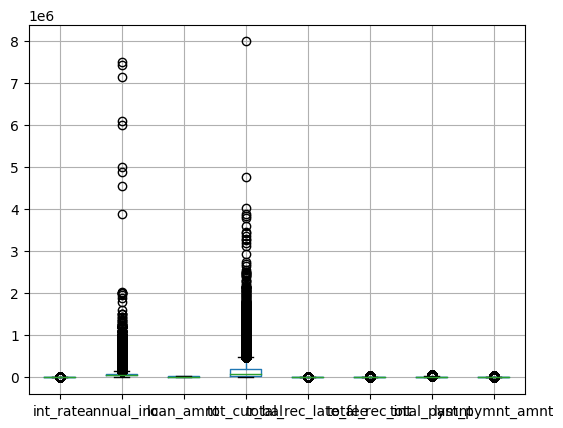

In [38]:
df.boxplot()

There are some outliers that needs to be handled in some of the features

## Histogram

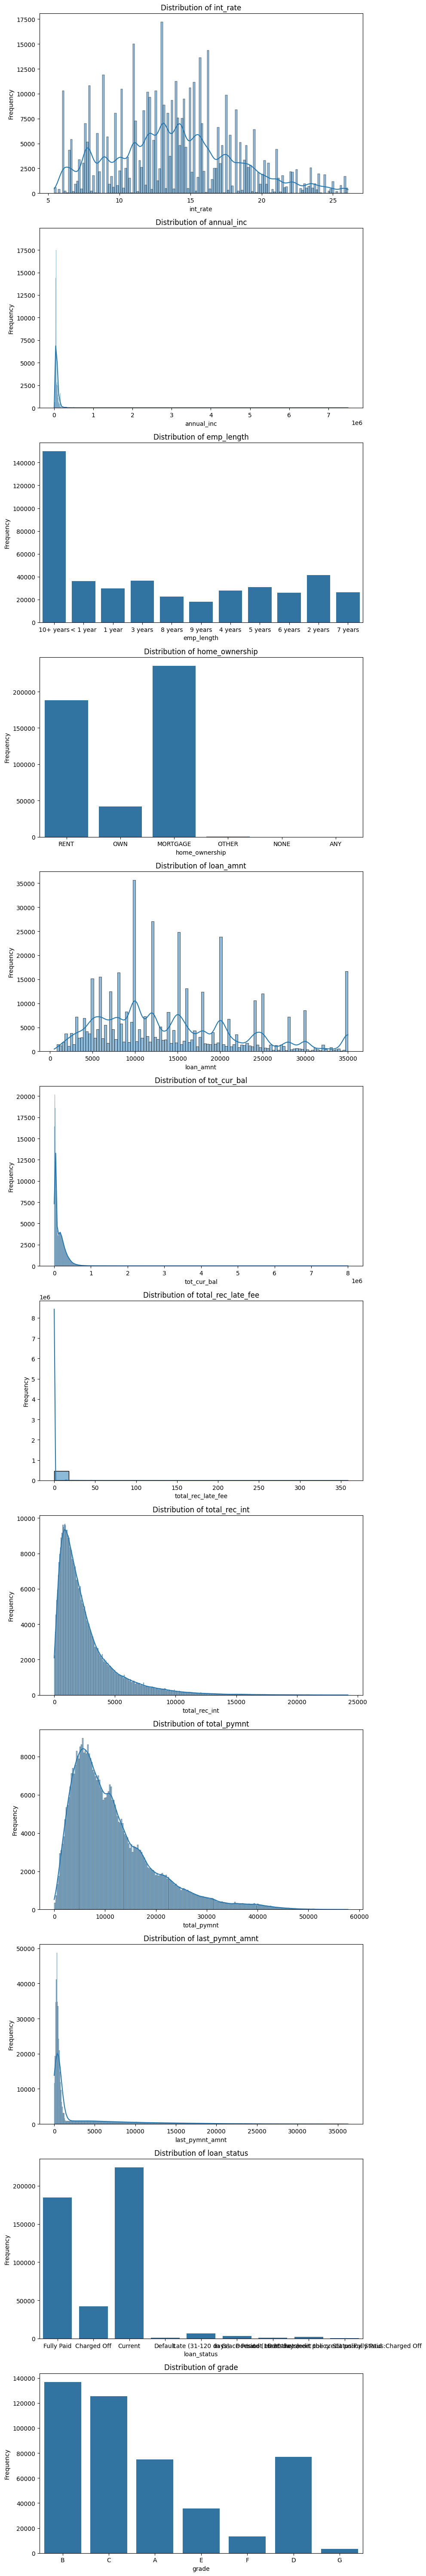

In [39]:
num_rows = len(df.columns)
fig, axes = plt.subplots(nrows=num_rows, ncols=1, figsize=(10, 5 * num_rows))

# Flattening the axis array for easy iteration
axes = axes.flatten()

# Iterate over each column and plot according to its data type
for i, col in enumerate(df.columns):
    if df[col].dtype == 'float64' or df[col].dtype == 'int64':
        sns.histplot(df[col], ax=axes[i], kde=True)
    else:
        sns.countplot(x=df[col], ax=axes[i])

    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

# **Data Preprocessing**

## Removing all of the NaN or Null values

In [40]:
df = df.dropna()
missing_values_summary = df.isna().sum()
print(missing_values_summary[missing_values_summary > 0])

Series([], dtype: int64)


now the dataframe doesn't have a Nan or Null values in all of the features

## Categorize the home_ownership

In [41]:
def home_ownership_redone(home_ownership):
  if home_ownership != 'OWN':
    return 0
  return 1

df.loc[:, 'home_ownership'] = df['home_ownership'].apply(home_ownership_redone)
df['home_ownership'].unique()

<ipython-input-41-b2d6ee114dfb>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, 'home_ownership'] = df['home_ownership'].apply(home_ownership_redone)
<ipython-input-41-b2d6ee114dfb>:6: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.loc[:, 'home_ownership'] = df['home_ownership'].apply(home_ownership_redone)


array([1, 0])

## Categorize the emp_length

In [42]:
def categorize_emp_length(emp_length):
    # Remove ' years' and ' year' from the string
    emp_length = emp_length.replace(' years', '').replace(' year', '')

    # Special case for '< 1 year'
    if emp_length == '< 1':
        return 0

    # Convert to integer
    emp_length = int(emp_length.strip('+'))

    # Return 1 if more than 5 years, else 0
    return 1 if emp_length > 5 else 0

# Example usage with a DataFrame
df['emp_length_categorized'] = df['emp_length'].apply(categorize_emp_length)
df = df.drop(['emp_length'],axis =1)

<ipython-input-42-bd3eb1fac7f3>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['emp_length_categorized'] = df['emp_length'].apply(categorize_emp_length)


This function changes the emp_length that is <=5 years into 0, while >5 into 1

## Categorize the grade

In [43]:
def categorize_grade(grade):
    grade_mapping = {
        'A': 1,
        'B': 2,
        'C': 3,
        'D': 4,
        'E': 5,
        'F': 6,
        'G' : 7
    }
    return grade_mapping.get(grade, None)  # Returns None if grade is not in the mapping

# Example usage with a DataFrame
# Assuming the DataFrame is named df and has a column 'grade'
df['grade_categorized'] = df['grade'].apply(categorize_grade)
df = df.drop(['grade'],axis =1)

## Categorize the loan_status

In [44]:
def categorize_loan_status(status):
    if status in ['Current', 'Fully Paid']:
        return 0  # Low Risk
    elif status in ['Late (31-120 days)', 'Late (16-30 days)']:
        return 1  # Medium Risk
    else:
        return 2  # High Risk

# Example usage with a DataFrame
df['loan_status_categorized'] = df['loan_status'].apply(categorize_loan_status)
df = df.drop(['loan_status'],axis =1)

This function changes it to a range between 0-2

0 := low risk
1 := medium risk
2 := high risk

## Log Transformation

In [45]:
def log_transform_feature(df, column_name):
    # Check for non-positive values
    if (df[column_name] <= 0).any():
        # Apply an offset to avoid log(0) or log of negative numbers
        min_positive = df[column_name][df[column_name] > 0].min()
        offset = min_positive if min_positive > 1 else 1
        transformed_column = np.log(df[column_name] + offset)
    else:
        # Directly apply log transformation
        transformed_column = np.log(df[column_name])

    # Return the DataFrame with the transformed column
    df[column_name + '_log_transformed'] = transformed_column
    return df
df = log_transform_feature(df,'annual_inc')
df = log_transform_feature(df,'tot_cur_bal')
df = log_transform_feature(df,'last_pymnt_amnt')
df = log_transform_feature(df,'total_rec_int')
df = df.drop(['annual_inc'],axis =1)
df = df.drop(['tot_cur_bal'],axis =1)
df = df.drop(['last_pymnt_amnt'],axis =1)
df = df.drop(['total_rec_int'],axis =1)


In [46]:
df

,int_rate,home_ownership,loan_amnt,total_rec_late_fee,total_pymnt,emp_length_categorized,grade_categorized,loan_status_categorized,annual_inc_log_transformed,tot_cur_bal_log_transformed,last_pymnt_amnt_log_transformed,total_rec_int_log_transformed
42535,10.99,1,27050,0.0,21251.040000,1,2,0,10.915088,11.651252,6.787236,8.347813
42536,13.98,0,9750,0.0,7994.830000,0,3,0,10.165852,9.555631,5.811560,7.579061
42537,6.62,0,12000,0.0,8842.800000,1,1,0,11.561716,12.497424,5.912015,7.012494
42538,13.53,0,12000,0.0,13359.770000,1,2,0,10.596635,9.518266,4.788907,7.215813
42539,8.90,0,15000,0.0,11431.200000,0,1,0,11.050890,12.515368,6.168145,7.539809
...,...,...,...,...,...,...,...,...,...,...,...,...
466280,14.47,0,18400,0.0,10383.360000,0,3,0,11.608236,12.594727,6.072215,8.424718
466281,19.97,0,22000,0.0,4677.920000,1,4,2,11.264464,12.309671,2.917771,7.952221
466282,16.99,0,20700,0.0,12343.980000,1,4,0,10.736397,11.206387,6.244827,8.711656
466283,7.90,1,2000,0.0,2126.579838,0,1,0,11.326596,13.290605,7.314340,4.848744


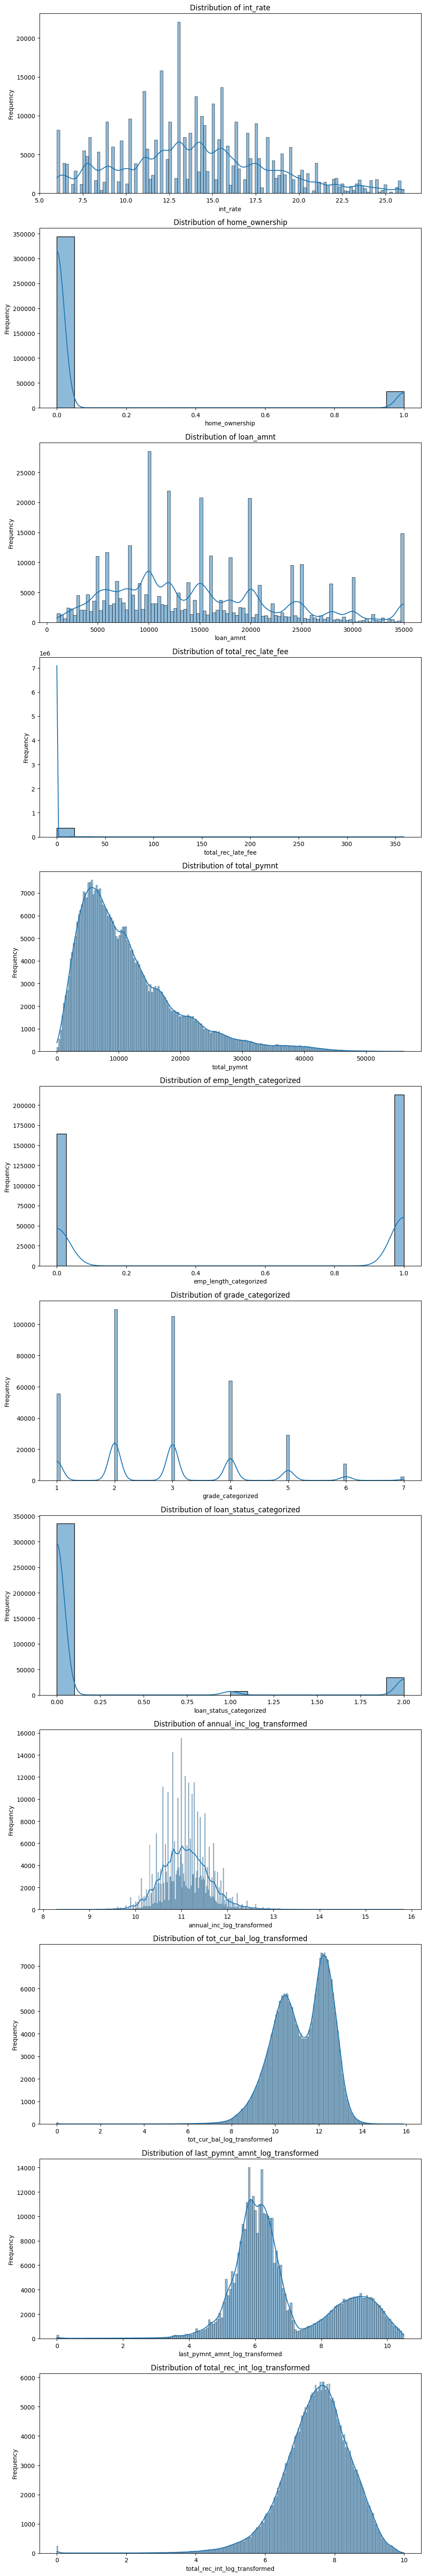

In [47]:
num_rows = len(df.columns)
fig, axes = plt.subplots(nrows=num_rows, ncols=1, figsize=(10, 5 * num_rows))

# Flattening the axis array for easy iteration
axes = axes.flatten()

# Iterate over each column and plot according to its data type
for i, col in enumerate(df.columns):
    if df[col].dtype == 'float64' or df[col].dtype == 'int64':
        sns.histplot(df[col], ax=axes[i], kde=True)
    else:
        sns.countplot(x=df[col], ax=axes[i])

    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

We all set for the preprocessing part, now comes the exciting part which is data modelling

# Data Modelling

## Splitting Data

In [48]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
X = df.drop('loan_status_categorized', axis = 1)
y = df['loan_status_categorized']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

## Modelling

In [50]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Determine the number of features and number of classes
n_features = X_train_scaled.shape[1]
n_classes = len(y.unique())

# Building the model
model = Sequential()
model.add(Dense(10, input_dim=n_features, activation='relu'))  # First hidden layer
model.add(Dense(8, activation='relu'))  # Second hidden layer
model.add(Dense(n_classes, activation='softmax'))  # Output layer

# Compile the model
model.compile(loss='sparse_categorical_crossentropy',  # Use 'categorical_crossentropy' if y is one-hot encoded
              optimizer='adam',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train_scaled, y_train, validation_data=(X_test_scaled, y_test), epochs=10, batch_size=32)


Epoch 1/10
9427/9427 [==============================] - 22s 2ms/step - loss: 0.3289 - accuracy: 0.8981 - val_loss: 0.2953 - val_accuracy: 0.9046
Epoch 2/10
9427/9427 [==============================] - 26s 3ms/step - loss: 0.2739 - accuracy: 0.9154 - val_loss: 0.2594 - val_accuracy: 0.9236
Epoch 3/10
9427/9427 [==============================] - 24s 3ms/step - loss: 0.2537 - accuracy: 0.9235 - val_loss: 0.2457 - val_accuracy: 0.9268
Epoch 4/10
9427/9427 [==============================] - 22s 2ms/step - loss: 0.2454 - accuracy: 0.9264 - val_loss: 0.2432 - val_accuracy: 0.9271
Epoch 5/10
9427/9427 [==============================] - 25s 3ms/step - loss: 0.2421 - accuracy: 0.9275 - val_loss: 0.2487 - val_accuracy: 0.9236
Epoch 6/10
9427/9427 [==============================] - 23s 2ms/step - loss: 0.2402 - accuracy: 0.9284 - val_loss: 0.2385 - val_accuracy: 0.9285
Epoch 7/10
9427/9427 [==============================] - 24s 3ms/step - loss: 0.2391 - accuracy: 0.9287 - val_loss: 0.2357 - val_ac

## Evaluation

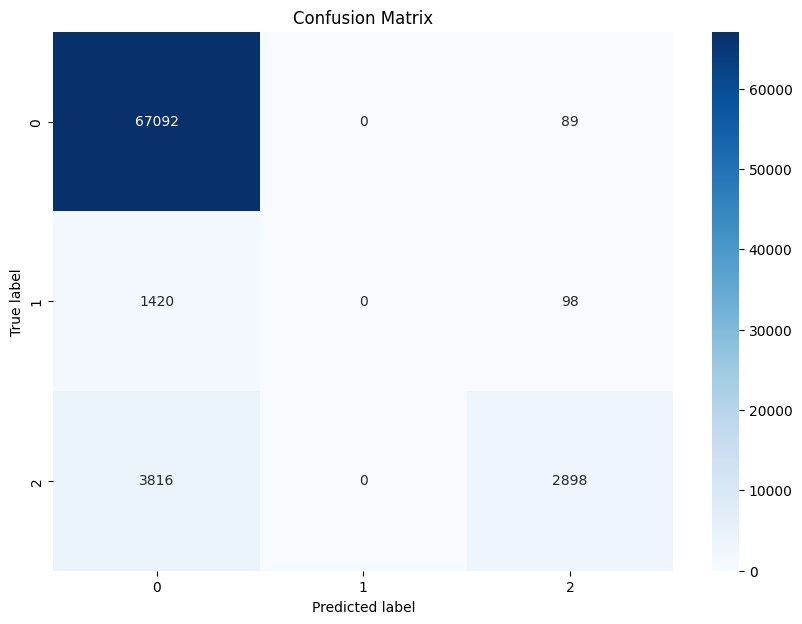

In [53]:
# Convert probabilities to class labels
y_pred_labels = np.argmax(y_pred, axis=1)

# Now generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_labels)

# Plotting the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.show()

In [54]:
from sklearn.metrics import accuracy_score, classification_report

# Assuming y_pred_labels are the predicted class labels from your model
# y_test are the true class labels

# Calculate Accuracy
accuracy = accuracy_score(y_test, y_pred_labels)
print(f"Accuracy: {accuracy:.2f}")

# Generate a classification report
report = classification_report(y_test, y_pred_labels, target_names=['Class 0', 'Class 1', 'Class 2'])
print("Classification Report:\n", report)


Accuracy: 0.93
Classification Report:
               precision    recall  f1-score   support

     Class 0       0.93      1.00      0.96     67181
     Class 1       0.00      0.00      0.00      1518
     Class 2       0.94      0.43      0.59      6714

    accuracy                           0.93     75413
   macro avg       0.62      0.48      0.52     75413
weighted avg       0.91      0.93      0.91     75413



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
